<a href="https://colab.research.google.com/github/charucheema/CMPE255_Assignment_2_Dimensionality_Reduction_Techniques/blob/main/CMPE255_Assignment_2_Dimensionality_Reduction_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstrating various dimensionality reduction techniques**

In [126]:
#importing Libraries
import pandas as pd
import numpy as nm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# install UMap dependency
!pip install umap-learn[plot]

from umap import UMAP
from sklearn.manifold import LocallyLinearEmbedding


## **DIMENSIONALITY REDUCTION ON TABULAR DATA**`

In [127]:
heart = pd.read_csv('/content/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
heart.shape

(303, 14)

In [129]:
#Segregating features and target
x_variable = heart.iloc[:,0:13]
y_variable = heart.iloc[:,13]
x_variable

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [130]:
#Normalize data using standard scalar
scaler = StandardScaler()
transformed_df = scaler.fit_transform(x_variable)

## **Implementing PCA**

In [131]:
# PCA with 2 components
pca_2 = PCA(n_components=2)

# Fit and transform the model on the scalar transformed dataset
pca_2d = pca_2.fit_transform(transformed_df)

explained_variance = pca_2.explained_variance_ratio_
print('Variance of each component in 2 components:', pca_2.explained_variance_ratio_)
print('Cumulative Variance Explained:', round(sum(list(pca_2.explained_variance_ratio_))*100, 2))

Variance of each component in 2 components: [0.21254053 0.11820708]
Cumulative Variance Explained: 33.07


In [133]:
# PCA with 3 components
pca_3 = PCA(n_components=3)

# Fit and transform the model on the scalar transformed dataset
pca_3d = pca_3.fit_transform(transformed_df)

explained_variance = pca_3.explained_variance_ratio_
print('Variance of each component in 3 components:', pca_3.explained_variance_ratio_)
print('Cumulative Variance Explained:', round(sum(list(pca_3.explained_variance_ratio_))*100, 2))

Variance of each component in 3 components: [0.21254053 0.11820708 0.09406418]
Cumulative Variance Explained: 42.48


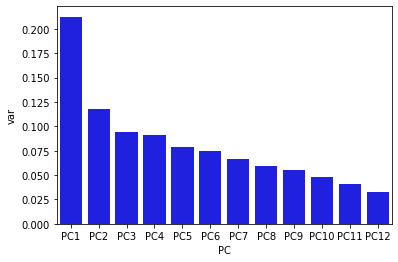

In [134]:
#PCA with different number of components
pca=PCA()

pca.n_components=12 
pca = pca.fit(transformed_df)

df = pd.DataFrame({'var' :  pca.explained_variance_ratio_,
                  'PC': ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']})

sns.barplot(x='PC', y='var', data= df, color="b")

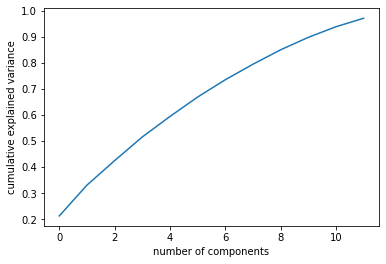

In [135]:
var_explained = pca.explained_variance_ratio_ 
cum_var_explained=nm.cumsum(var_explained)

plt.plot(cum_var_explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

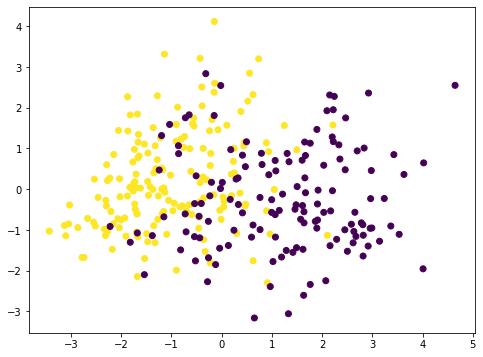

In [136]:
#PCA 2d plot
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y_variable)
plt.show()

In [137]:
#PCA 3d plot
px.scatter_3d(pca_3d, x=pca_3d[:,0], y=pca_3d[:,1], z=pca_3d[:,2], color=y_variable)


## **Implementing TSNE**

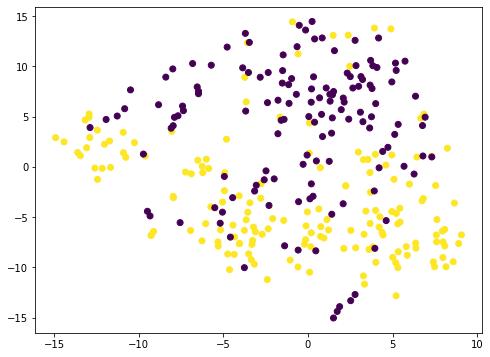

In [138]:
#We were seeing good degree of cumulative explained covariance in PCA with 9 components
pca_9 = PCA(n_components=9)
pca_9 = pca_9.fit_transform(transformed_df)

#Post PCA dimensionality reduction, lets use TSNE to further reduce dimensionality
tsne_2 = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_9)

#plot 2d
plt.figure(figsize=(8,6))
plt.scatter(tsne_2[:,0], tsne_2[:,1], c = y_variable)
plt.show()

In [139]:
#plot 3d
tsne_3 = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_9)
px.scatter_3d(tsne_3,x=tsne_3[:,0], y=tsne_3[:,1], z=tsne_3[:,2],color=y_variable)


## **Implementing UMAP**

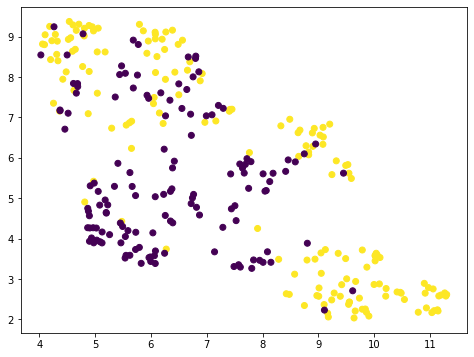

In [140]:
# lets use UMAP to reduce dimensionality
umap_2 = UMAP(random_state=42, n_components=2).fit_transform(transformed_df)

#plot umap 2d
plt.figure(figsize=(8,6))
plt.scatter(umap_2[:,0], umap_2[:,1], c = y_variable)
plt.show()


In [141]:
#plot umap 3d
umap_3 = UMAP(random_state=42, n_components=3).fit_transform(transformed_df)
px.scatter_3d(umap_3,x=umap_3[:,0], y=umap_3[:,1], z=umap_3[:,2],color=y_variable)


## **Implementing LLE**

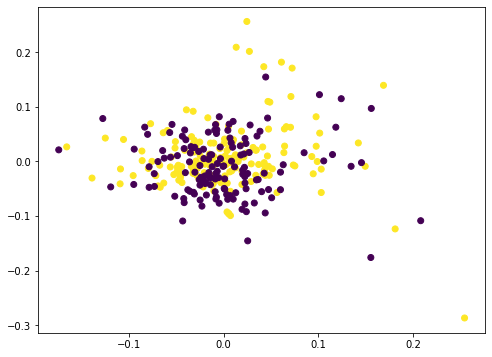

In [142]:
# lets use LLE to reduce dimensionality
LLE_2 = LocallyLinearEmbedding(n_components=2, n_neighbors=15).fit_transform(transformed_df)

#plot LLE 2D
plt.figure(figsize=(8,6))
plt.scatter(LLE_2[:,0], LLE_2[:,1], c = y_variable)
plt.show()

In [143]:
#plot LLE 3D
LLE_3 = LocallyLinearEmbedding(n_components=3, n_neighbors=15).fit_transform(transformed_df)
px.scatter_3d(LLE_3,x=LLE_3[:,0], y=LLE_3[:,1], z=LLE_3[:,2],color=y_variable)


## **Implementing ISOMAP**

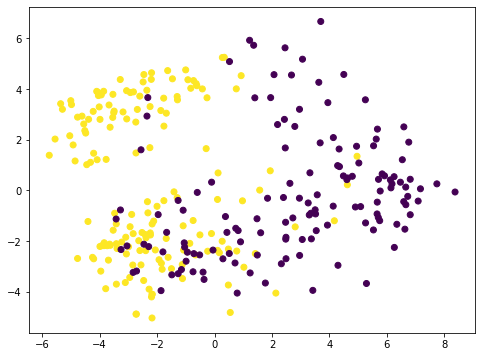

In [144]:
# lets use ISOMAP to reduce dimensionality
iso_2 = Isomap(n_neighbors = 10,n_components = 2).fit_transform(transformed_df)

#plot isomap 2d
plt.figure(figsize=(8,6))
plt.scatter(iso_2[:,0], iso_2[:,1], c = y_variable)
plt.show()




In [145]:
#plot isomap 3d
iso_3 = Isomap(n_neighbors = 10,n_components = 3).fit_transform(transformed_df)
px.scatter_3d(iso_3,x=iso_3[:,0], y=iso_3[:,1], z=iso_3[:,2],color=y_variable)

## **Implementing SVD**

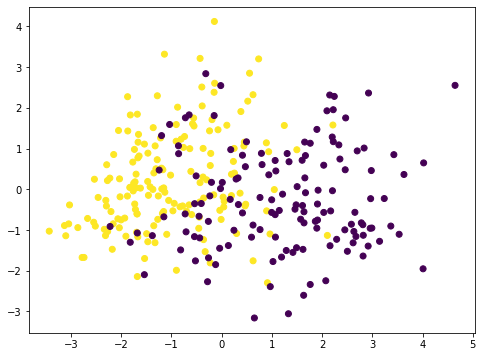

In [146]:
# lets use SVD to reduce dimensionality
svd_2 = TruncatedSVD(n_components=2).fit_transform(transformed_df)

#plot SVD 2d
plt.figure(figsize=(8,6))
plt.scatter(svd_2[:,0], svd_2[:,1], c = y_variable)
plt.show()


In [147]:
#plot SVD 3d
svd_3 = TruncatedSVD(n_components=3).fit_transform(transformed_df)
px.scatter_3d(svd_3,x=svd_3[:,0], y=svd_3[:,1], z=svd_3[:,2],color=y_variable)

## **DIMENSIONALITY REDUCTION ON IMAGE DATASET**

In [148]:
fashion_train = pd.read_csv("/content/fashion-mnist_train.csv")

In [149]:
fashion_train.shape

(60000, 785)

In [150]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [151]:
fashion_data = fashion_train.head(5000)
fashion_data.shape

(5000, 785)

In [152]:
#Segregating features and target
features = fashion_data.iloc[:,1:999]
target = fashion_data.iloc[:,0]
# Create an empty list which will save all meaningful labels

target = []
# Loop through all label
for i in range(fashion_data.shape[0]):
    # Extract the label for comparison
    if fashion_data['label'][i] == 0:
        # Save meaningful label to the results
        target.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif fashion_data['label'][i] == 1:
        target.append('Trouser')
    elif fashion_data['label'][i] == 2:
        target.append('Pullover')
    elif fashion_data['label'][i] == 3:
        target.append('Dress')
    elif fashion_data['label'][i] == 4:
        target.append('Coat')
    elif fashion_data['label'][i] == 5:
        target.append('Sandal')
    elif fashion_data['label'][i] == 6:
        target.append('Shirt')
    elif fashion_data['label'][i] == 7:
        target.append('Sneaker')
    elif fashion_data['label'][i] == 8:
        target.append('Bag')
    elif fashion_data['label'][i] == 9:
        target.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))


In [153]:
#Normalize data using standard scalar
scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)

## **Implementing PCA**

In [154]:
# PCA with 2 components
pca_2 = PCA(n_components=2)

# Fit and transform the model on the scalar transformed dataset
pca_2d = pca_2.fit_transform(transformed_features)

explained_variance = pca_2.explained_variance_ratio_
print('Variance of each component in 2 components:', pca_2.explained_variance_ratio_)
print('Cumulative Variance Explained:', round(sum(list(pca_2.explained_variance_ratio_))*100, 2))

Variance of each component in 2 components: [0.21942503 0.14267224]
Cumulative Variance Explained: 36.21


In [155]:
# PCA with 3 components
pca_3 = PCA(n_components=3)

# Fit and transform the model on the scalar transformed dataset
pca_3d = pca_3.fit_transform(transformed_features)

explained_variance = pca_3.explained_variance_ratio_
print('Variance of each component in 3 components:', pca_3.explained_variance_ratio_)
print('Cumulative Variance Explained:', round(sum(list(pca_3.explained_variance_ratio_))*100, 2))

Variance of each component in 3 components: [0.21942503 0.14267224 0.05539349]
Cumulative Variance Explained: 41.75


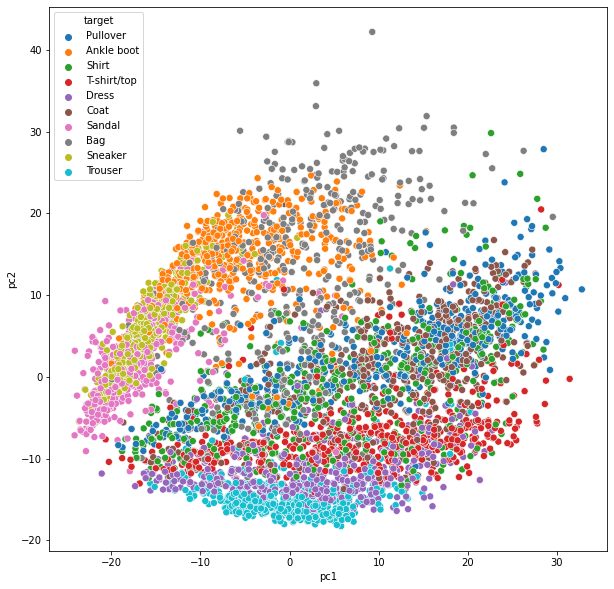

In [156]:
#PCA 2d plot
pca_2_df = pd.DataFrame(pca_2d, columns=("pc1", "pc2"))
pca_2_df["target"] = target;

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = pca_2_df["pc1"], y = pca_2_df["pc2"], data = pca_2_df, hue = "target", s=50, ax=ax)
plt.show()


In [157]:
#PCA 3d plot
pca_3_df = pd.DataFrame(pca_3d, columns=("pc1", "pc2", "pc3"))
pca_3_df["target"] = target;

px.scatter_3d(pca_3_df, x=pca_3_df["pc1"], y=pca_3_df["pc2"], z=pca_3_df["pc3"], color=pca_3_df["target"])

## **Implementing TSNE**

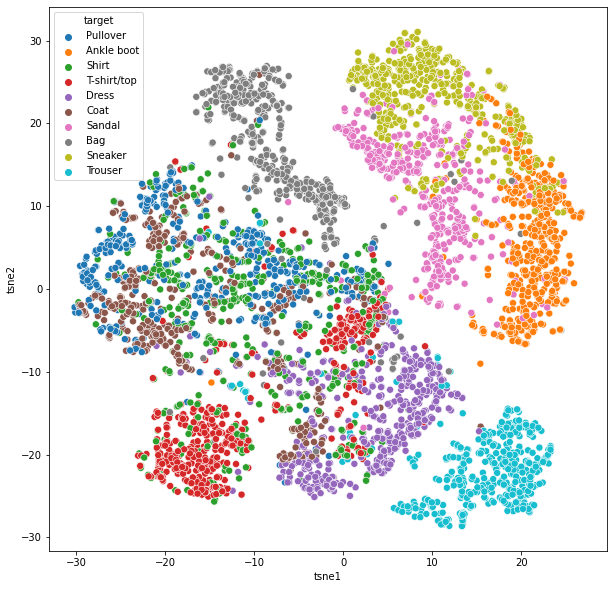

In [158]:
#We were seeing good degree of cumulative explained covariance in PCA with 200 components
pca_200 = PCA(n_components=200)
pca_200 = pca_200.fit_transform(transformed_features)

#Post PCA dimensionality reduction, lets use TSNE to further reduce dimensionality
tsne_2 = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_200)

tsne_2_df = pd.DataFrame(tsne_2, columns=("tsne1", "tsne2"))
tsne_2_df["target"] = target;

#plot 2d
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = tsne_2_df["tsne1"], y = tsne_2_df["tsne2"], data = tsne_2_df, hue = "target", s=50, ax=ax)
plt.show()

In [159]:
#plot 3d
tsne_3 = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_200)

tsne_3_df = pd.DataFrame(tsne_3, columns=("tsne1", "tsne2", "tsne3"))
tsne_3_df["target"] = target;

px.scatter_3d(tsne_3_df, x=tsne_3_df["tsne1"], y=tsne_3_df["tsne2"], z=tsne_3_df["tsne3"], color=tsne_3_df["target"])

## **Implementing UMAP**

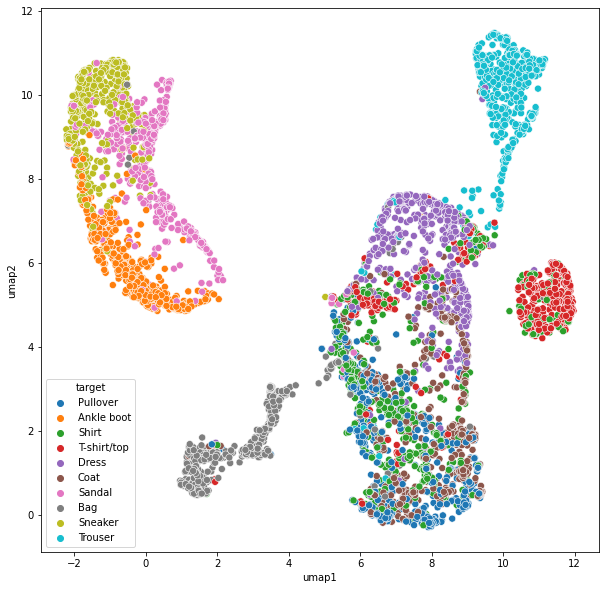

In [160]:
# lets use UMAP to reduce dimensionality
umap_2 = UMAP(random_state=42, n_components=2).fit_transform(transformed_features)

umap_2_df = pd.DataFrame(umap_2, columns=("umap1", "umap2"))
umap_2_df["target"] = target;

#plot 2d
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = umap_2_df["umap1"], y = umap_2_df["umap2"], data = umap_2_df, hue = "target", s=50, ax=ax)
plt.show()

In [161]:
#plot 3d
umap_3 = UMAP(random_state=42, n_components=3).fit_transform(transformed_features)
umap_3_df = pd.DataFrame(umap_3, columns=("umap1", "umap2", "umap3"))
umap_3_df["target"] = target;

px.scatter_3d(umap_3_df, x=umap_3_df["umap1"], y=umap_3_df["umap2"], z=umap_3_df["umap3"], color=umap_3_df["target"])

## **Implementing LLE**

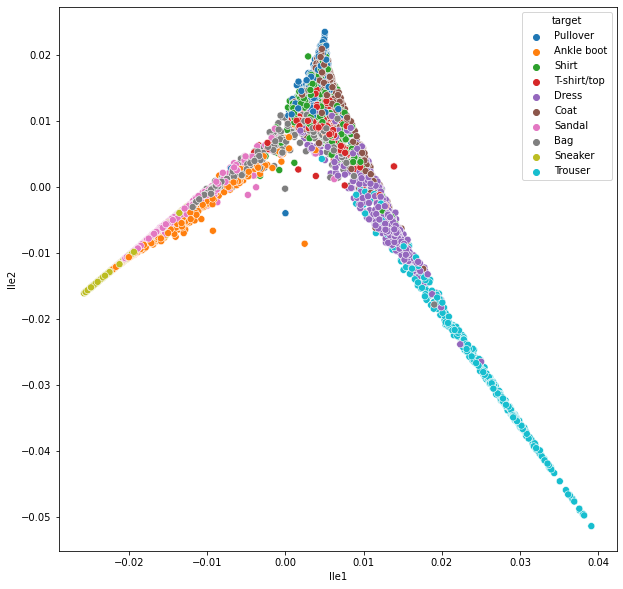

In [162]:
# lets use LLE to reduce dimensionality
lle_2 = LocallyLinearEmbedding(n_components=2, n_neighbors=15).fit_transform(transformed_features)
lle_2_df = pd.DataFrame(lle_2, columns=("lle1", "lle2"))
lle_2_df["target"] = target;

#plot 2d
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = lle_2_df["lle1"], y = lle_2_df["lle2"], data = lle_2_df, hue = "target", s=50, ax=ax)
plt.show()

In [163]:
#plot 3d
lle_3 = LocallyLinearEmbedding(n_components=3, n_neighbors=15).fit_transform(transformed_features)
lle_3_df = pd.DataFrame(lle_3, columns=("lle1", "lle2", "lle3"))
lle_3_df["target"] = target;

px.scatter_3d(lle_3_df, x=lle_3_df["lle1"], y=lle_3_df["lle2"], z=lle_3_df["lle3"], color=lle_3_df["target"])

## **Implementing ISOMAP**

In [ ]:
# lets use ISOMAP to reduce dimensionality
iso_2 = Isomap(n_neighbors = 10,n_components = 2).fit_transform(transformed_features)

#plot 2d
iso_2_df = pd.DataFrame(iso_2, columns=("iso1", "iso2"))
iso_2_df["target"] = target;

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = iso_2_df["iso1"], y = iso_2_df["iso2"], data = iso_2_df, hue = "target", s=50, ax=ax)
plt.show()

In [120]:
#plot 3d
iso_3 = Isomap(n_neighbors = 10, n_components = 3).fit_transform(transformed_features)
iso_3_df = pd.DataFrame(iso_3, columns=("iso1", "iso2", "iso3"))
iso_3_df["target"] = target;

px.scatter_3d(iso_3_df, x=iso_3_df["iso1"], y=iso_3_df["iso2"], z=iso_3_df["iso3"], color=iso_3_df["target"])

## **Implementing SVD**

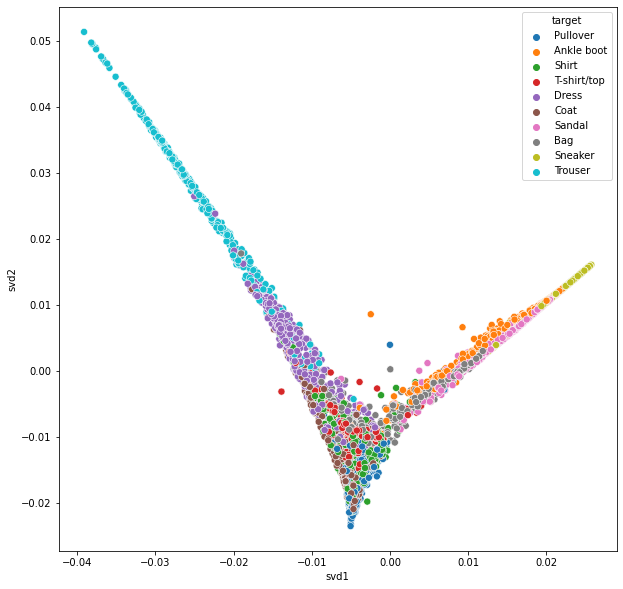

In [121]:
# lets use SVD to reduce dimensionality
svd_2 = TruncatedSVD(n_components=2).fit_transform(transformed_features)

#plot 2d
svd_2_df = pd.DataFrame(svd_2, columns=("svd1", "svd2"))
svd_2_df["target"] = target;

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(x = svd_2_df["svd1"], y = svd_2_df["svd2"], data = svd_2_df, hue = "target", s=50, ax=ax)
plt.show()


In [ ]:
#plot 3d
svd_3 = TruncatedSVD(n_components=3).fit_transform(transformed_features)

svd_3_df = pd.DataFrame(svd_3, columns=("svd1", "svd2", "svd3"))
svd_3_df["target"] = target;

px.scatter_3d(svd_3_df, x=svd_3_df["svd1"], y=svd_3_df["svd2"], z=svd_3_df["svd3"], color=svd_3_df["target"])